In [77]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
claims = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv')

In [79]:
cust_demographics = pd.read_csv(r'C:\Users\Sughu\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')

In [80]:
claims.shape

(1100, 10)

In [81]:
cust_demographics.shape

(1085, 6)

In [82]:
#1
cust_claims = pd.merge(left=cust_demographics,right=claims,left_on='CUST_ID',right_on='customer_id',how='inner')

In [83]:
#2 Data Audit
cust_claims.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [84]:
#2
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['DateOfBirth'])

In [85]:
cust_claims['claim_date'] = pd.to_datetime(cust_claims['claim_date'])

In [86]:
#3 Converting the column claim_amount to numeric
cust_claims['claim_amount'] = cust_claims['claim_amount'].apply(lambda x:str(x).replace('$','')).astype('float')

In [87]:
#4 Alert flag for unreported claims
cust_claims['unreported'] = np.where(cust_claims['police_report']=='Unknown',1,0)

In [88]:
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,2070-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0
1083,11256802,Female,2064-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


In [89]:
#5 Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

cust_claims.drop_duplicates(subset='CUST_ID').sort_values(by='claim_date',ascending=False)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
226,17682060,Female,1974-11-21,NV,186-195-3465,Gold,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,1
286,93915431,Male,2067-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
751,28932340,Male,1996-01-05,LA,652-265-8231,Gold,25213498,28932340,Driver error,2018-10-30,Auto,Unknown,Material only,NaN,1.0,No,1
1055,58451506,Male,2068-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0
120,39587790,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,0
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0


In [90]:
#6 Check for missing values and impute the missing values with an appropriate value

cust_claims['claim_amount'] = cust_claims['claim_amount'].fillna(cust_claims['claim_amount'].mean(),axis=0)

In [91]:
cust_claims['total_policy_claims'] = cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])

In [92]:
cust_claims.isna().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
unreported             0
dtype: int64

In [93]:
year = pd.to_datetime(dt.datetime.today()).year

In [94]:
cust_claims['Age'] = year-cust_claims['DateOfBirth'].dt.year

In [95]:
#changing the year in dateofbirth which are having negative numbers in age
cust_claims['Year'] = cust_claims['DateOfBirth'].dt.year

In [96]:
cust_claims['Year'] = np.where(cust_claims['Age']<0,cust_claims['Year']-100,cust_claims['Year'])

In [97]:
cust_claims['day'] = cust_claims['DateOfBirth'].dt.day

In [98]:
cust_claims['month'] = cust_claims['DateOfBirth'].dt.month

In [99]:
#converting into strings for concatenation
cust_claims['Year'] = cust_claims['Year'].astype('str')

In [100]:
cust_claims['day'] = cust_claims['day'].astype('str')

In [101]:
cust_claims['month'] = cust_claims['month'].astype('str')

In [102]:
#after concatenation again converted into datetime format
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['day']+'-'+cust_claims['month']+'-'+cust_claims['Year'],format='%d-%m-%Y')

In [103]:
#drop unwanted columns
cust_claims = cust_claims.drop(columns=['Year','day','month'])

In [104]:
#calculating the age now
year = pd.to_datetime(dt.datetime.today()).year

In [105]:
cust_claims['Age'] = year-cust_claims['DateOfBirth'].dt.year

In [106]:
#7 categorize the customers according to their age

cust_claims['Age_groups'] = np.where(cust_claims['Age']<18,'Children',np.where((cust_claims['Age']>=18) & (cust_claims['Age'] < 30),'Youth',np.where((cust_claims['Age']>=30) & (cust_claims['Age'] < 60),'Adult',np.where(cust_claims['Age']>=60,'Senior',0))))

In [107]:
#8 average amount claimed by the customers from various segments

cust_claims[['Segment','claim_amount']].groupby('Segment').mean()

,claim_amount
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


In [108]:
#9 total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

round(cust_claims.loc[cust_claims['claim_date']<'2018-09-10',:].groupby('incident_cause')['claim_amount'].sum(),2)

incident_cause
Crime                  724448.41
Driver error          3319952.18
Natural causes        1314120.63
Other causes          3724984.95
Other driver error    3318769.86
Name: claim_amount, dtype: float64

In [109]:
cust_claims.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
unreported                      int32
Age                             int64
Age_groups                     object
dtype: object

In [110]:
specified_state = ((cust_claims['State']=='TX') |  (cust_claims['State']=='DE') |  (cust_claims['State']=='AK'))

In [111]:
state_and_adults = (specified_state) & (cust_claims['Age_groups']=='Adult')

In [112]:
error = ((cust_claims['incident_cause']=='Driver error') | (cust_claims['incident_cause']=='Other driver error'))

In [113]:
#10 How many adults from TX, DE and AK claimed insurance for driver related issues and causes

cust_claims[(state_and_adults) & (error)]['CUST_ID'].count()

28

In [114]:
#11 Pie chart for claim amount based on gender and segment

segment_amount = round(pd.pivot_table(data=cust_claims,index='Segment',columns='gender',values='claim_amount',aggfunc=sum),2)

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

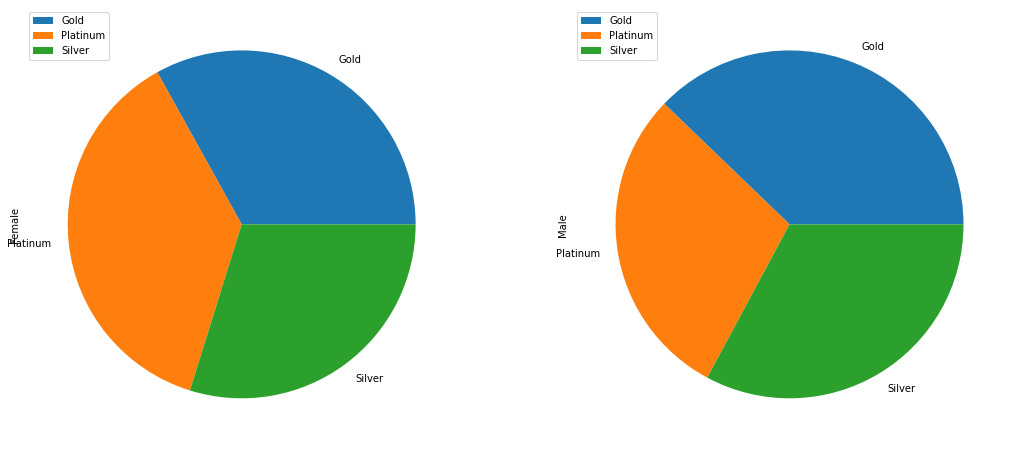

In [115]:
segment_amount.plot(kind='pie',subplots=True,figsize=(18,8))

In [116]:
amount = pd.pivot_table(data=cust_claims,index='incident_cause',columns='gender',values='claim_amount',aggfunc=sum).reset_index()

In [117]:
amount1 = round(amount[(amount['incident_cause']=='Driver error') | (amount['incident_cause']=='Other driver error')],2)

<AxesSubplot:>

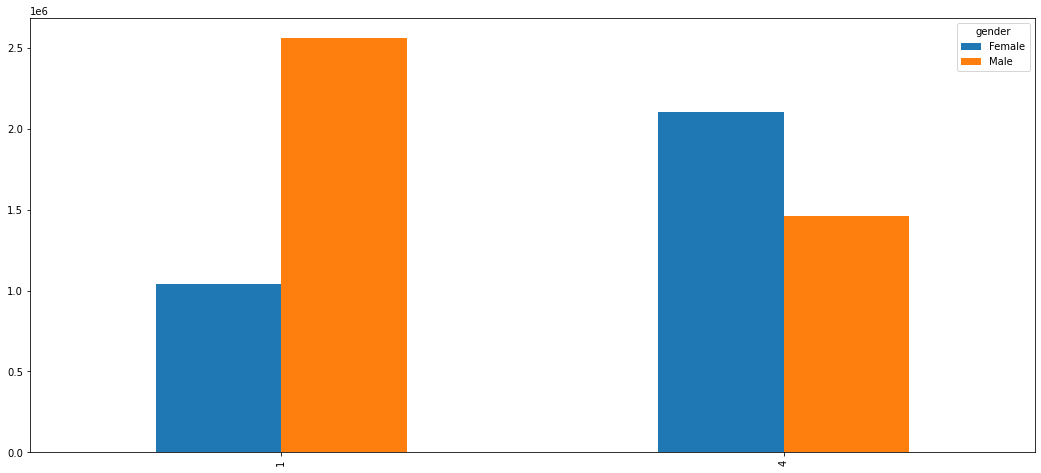

In [118]:
#12 Among males and females, which gender had claimed the most for any type of driver related issues

amount1.plot(kind='bar',figsize=(18,8))

#Male claim amount is high for driver error issues and Female claim amount is high for other driver error issues

In [119]:
cust_claims[['Age_groups']]

,Age_groups
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
...,...
1080,Adult
1081,Youth
1082,Adult
1083,Adult


In [120]:
count = cust_claims[cust_claims['fraudulent']=='Yes'].groupby('Age_groups')['Age_groups'].count()

<AxesSubplot:xlabel='Age_groups'>

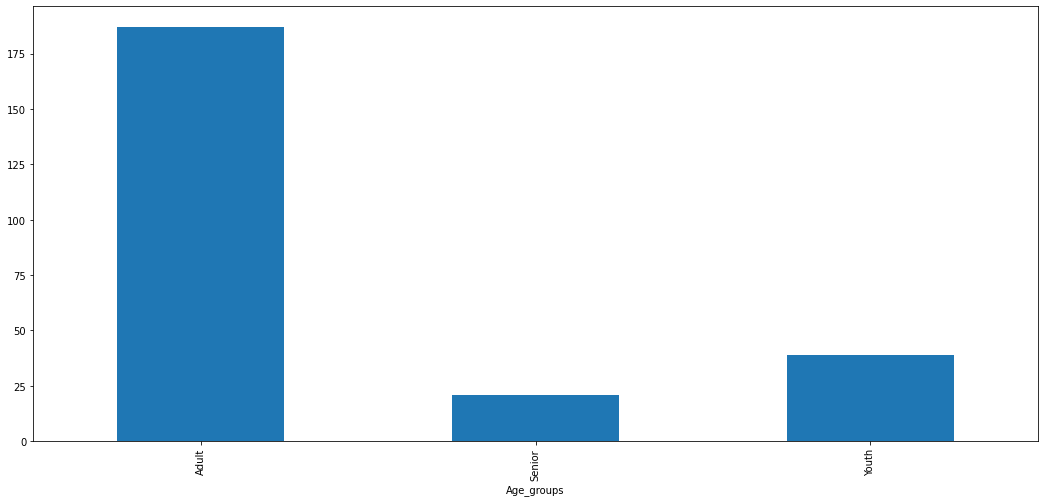

In [121]:
# Which age group had the maximum fraudulent policy claims

count.plot(kind='bar',figsize=(18,8))
# From the chart the adult group has maximum policy claims

In [122]:
cust_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,unreported,Age,Age_groups
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,43,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,1,52,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,38,Adult
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0,38,Adult
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,36,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0,41,Adult
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0,26,Youth
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0,32,Adult
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,58,Adult


In [123]:
cust_claims['Month'] = cust_claims['claim_date'].dt.month

In [124]:
Monthly_total_amount = round(cust_claims[['Month','claim_amount']].groupby('Month').sum(),2).reset_index()

<AxesSubplot:>

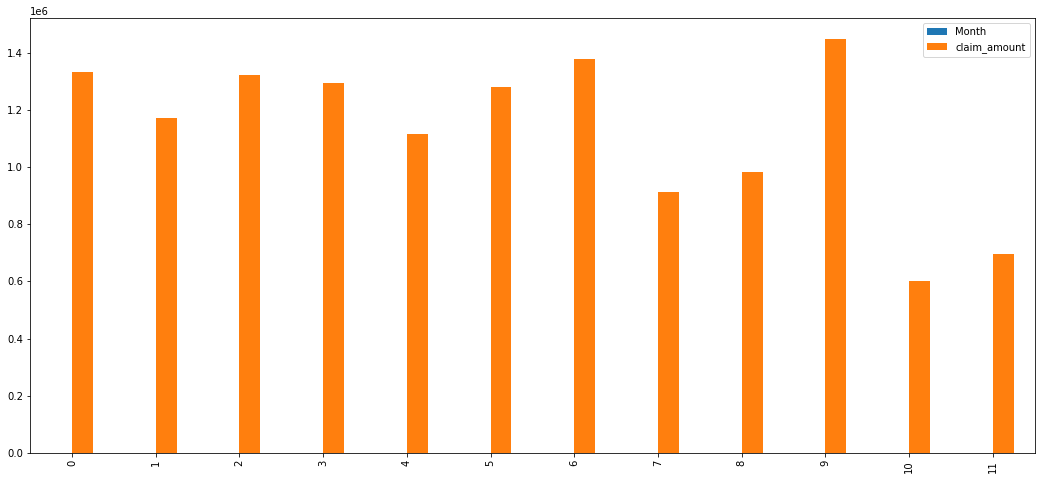

In [125]:
#14 Visualize the monthly trend of the total amount that has been claimed by the customers

Monthly_total_amount.plot(kind='bar',figsize=(18,8))

In [126]:
# average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

claim1 = cust_claims[cust_claims['fraudulent']=='Yes'].groupby(['Age_groups','gender'])[['claim_amount','Age_groups']].mean()

In [127]:
claim2 = cust_claims[cust_claims['fraudulent']=='No'].groupby(['Age_groups','gender'])[['claim_amount','Age_groups']].mean()

In [128]:
both_claims = pd.merge(left=claim1,right=claim2,on=['Age_groups','gender'],how='inner')

In [129]:
both_claims = both_claims.rename(columns={'claim_amount_x':'claim_amount_yes','claim_amount_y':'claim_amount_No'})

In [130]:
both_claims

claim_amount_yes  claim_amount_No
Age_groups gender                                   
Adult      Female      12527.234655     11946.548493
           Male        16281.321981     12247.133466
Senior     Female       3779.076923     14956.920343
           Male        16879.125000     12605.512092
Youth      Female       9214.010738     13172.449467
           Male         7797.732298     12087.228275

<AxesSubplot:title={'center':'fraudulent_No'}, xlabel='Age_groups,gender'>

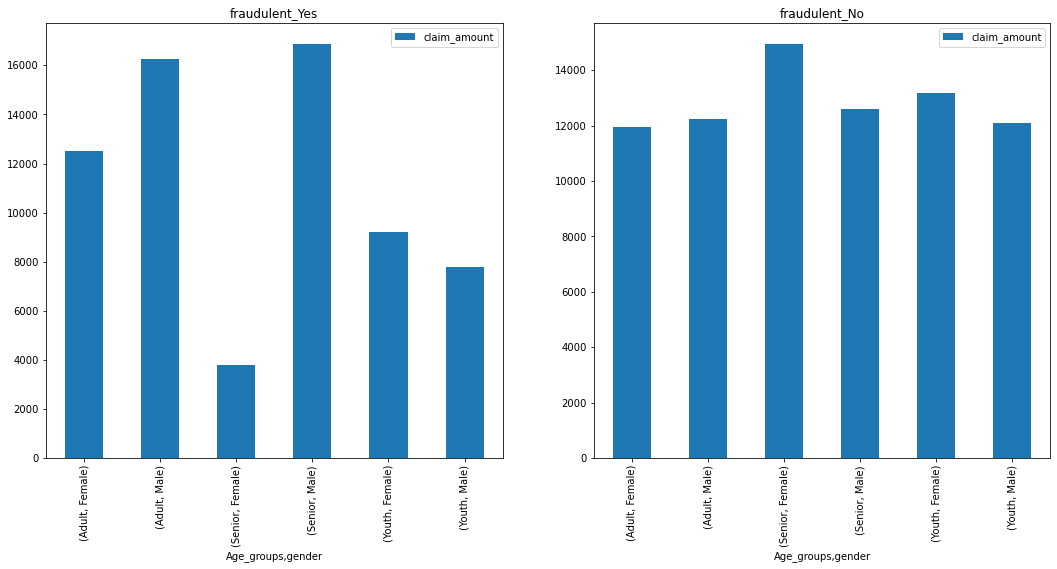

In [131]:
_,axes=plt.subplots(1,2,figsize=(18,8))
claim1.plot(kind='bar',ax=axes[0],title='fraudulent_Yes')
claim2.plot(kind='bar',ax=axes[1],title='fraudulent_No')

In [132]:
#16  Is there any similarity in the amount claimed by males and females
Male_amount1 = cust_claims.loc[cust_claims['gender']=='Male','claim_amount']

In [133]:
Female_amount1 = cust_claims.loc[cust_claims['gender']=='Female','claim_amount']


In [134]:
#Ho=there is similarity in amount claimed by males and females
#Ha=there is no similarity in amount claimed by males and females

In [135]:
import scipy.stats as stats


In [136]:
stats_value = stats.ttest_ind(a=Male_amount1,b=Female_amount1)

In [137]:
stats_value

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

In [138]:
p_value = stats_value.pvalue

In [139]:
if p_value<0.05:
    print('There is no similarity in amount claimed by males and females')
else:
    print('There is similarity in amount claimed by males and females')

There is similarity in amount claimed by males and females


In [140]:
#17 Is there any relationship between age category and segment

#Ho=there is relation
#Ha=there is no relation
#if pvalue<0.05 we can reject null hypothesis and accept alternate hypoyhesis
#if pvalue>0.05 we can't reject null hypothesis and accept null hypothesis

In [141]:
Age_group_segment = pd.crosstab(cust_claims.Age_groups,cust_claims.Segment)

In [142]:
stats.chi2_contingency(observed=Age_group_segment)

(0.6494456910829914,
 0.9574138066351555,
 4,
 array([[277.18894009, 267.5797235 , 257.23133641],
        [ 25.92165899,  25.02304147,  24.05529954],
        [ 71.88940092,  69.39723502,  66.71336406]]))

In [143]:
p_value = 0.9574138066351555

In [144]:
if p_value<0.05:
    print('We can reject null hypothesis')
else:
    print('We cannot reject null hypothesis')

We cannot reject null hypothesis


In [145]:
#There is relation between age category and segment

In [146]:
#18  The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

#Ho=The current year(which means 2018 by the data) has shown a significant rise in claim amounts as compared to 2016-17
#Ha=The current year(which means 2018 by the data) has not shown a significant rise in claim amounts as compared to 2016-17
#if pvalue<0.05 we can reject null hypothesis and accept alternate hypoyhesis
#if pvalue>0.05 we can't reject null hypothesis and accept null hypothesis

cust_claims['Year'] = cust_claims['claim_date'].dt.year

In [147]:
specific_year_amount1 = cust_claims[(cust_claims['Year']>=2016) & (cust_claims['Year']<=2017)]['claim_amount']

In [148]:
specific_year_amount2 = cust_claims[cust_claims['Year']==2018]['claim_amount']

In [164]:
stats.ttest_ind(a=specific_year_amount1,b=specific_year_amount2)

Ttest_indResult(statistic=-0.5191387627600287, pvalue=0.6037700468289373)

In [165]:
pvalue=0.6037700468289373

In [166]:
if p_value<0.05:
    print('We can reject null hypothesis')
else:
    print('We cannot reject null hypothesis')

We cannot reject null hypothesis


In [ ]:
#So,The current year has shown a significant rise in claim amounts as compared to 2016-17

In [150]:
#19 Is there any difference between age groups and insurance claims

#Ho=Adult_claims==Youth claims,there is no difference between age groups and total policy claims
#Ha=Adult_claims<>Youth claims,there is difference between age groups and total policy claims

In [151]:
Adult_claims = cust_claims['total_policy_claims'][cust_claims['Age_groups']=='Adult']

In [152]:
Youth_claims = cust_claims['total_policy_claims'][cust_claims['Age_groups']=='Youth']

In [153]:
stats.f_oneway(Adult_claims,Youth_claims)

F_onewayResult(statistic=0.9669760282846661, pvalue=0.32567147127981366)

In [154]:
pvalue=0.32567147127981366

In [155]:
if p_value<0.05:
    print('We can reject null hypothesis')
else:
    print('We cannot reject null hypothesis')

We cannot reject null hypothesis


In [156]:
#there is no difference in age groups and total policy claims

In [157]:
#20 . Is there any relationship between total number of policy claims and the claimed amount

#Ho=there is relation between total policy claims and amount
#Ha=there is no relation between total policy claims and amount

In [158]:
claims = cust_claims['total_policy_claims']

In [159]:
amount = cust_claims['claim_amount']

In [160]:
stats.f_oneway(claims,amount)

F_onewayResult(statistic=944.1538900002209, pvalue=2.006666036156095e-172)

In [161]:
pvalue=2.006666036156095e-172

In [162]:
if pvalue<0.05:
    print('We can reject null hypothesis')
else:
    print('We cannot reject null hypothesis')

We can reject null hypothesis


In [163]:
#with 95% confidence we can reject null hypothesis and accept alternate hypothesis
#There is no relation between total policy claims and amount